# **Homework 13: Multi-Agent Reinforcement Learning**

#### **Course:** Deep Reinforcement Learning

---
## Problem 1: Nash Equilibrium (Theory)

A Nash Equilibrium (NE) represents a state where no player can improve their outcome by unilaterally changing their strategy. For our games, we'll focus on finding the mixed-strategy NE, where players choose their actions probabilistically.

### 1.1 Standard Rock-Scissors-Paper

Given the standard RSP payoff matrix:

| Player 1 | Rock | Scissors | Paper |
| :--- | :--: | :---: | :---: |
| **Rock** | 0, 0 | 1, -1 | -1, 1 |
| **Scissors**| -1, 1 | 0, 0 | 1, -1 |
| **Paper** | 1, -1 | -1, 1 | 0, 0 |


**Your Task:** Analytically derive the mixed-strategy Nash Equilibrium for this game. Show the steps for setting up the indifference equations for Player 1 and solving for Player 2's equilibrium strategy probabilities $(q_R, q_S, q_P)$. (find the Mixed Nash equilibrium of the game)

#### Answer:

In a mixed-strategy Nash Equilibrium, Player 1 must be indifferent to choosing any of their three actions. This means their expected payoff from playing Rock, Scissors, or Paper against Player 2's strategy must be the same.

Let Player 2's probabilities be $q_R, q_S, q_P$, where $q_R + q_S + q_P = 1$.

Player 1's expected payoffs are:
* Rock: $E_1(R) = q_S - q_P$
* Scissors: $E_1(S) = q_P - q_R$
* Paper: $E_1(P) = q_R - q_S$

We set these expected payoffs equal to each other:

$E_1(R) = E_1(S) \implies q_S - q_P = q_P - q_R \implies q_R + q_S = 2q_P$

$E_1(S) = E_1(P) \implies q_P - q_R = q_R - q_S \implies q_S + q_P = 2q_R$

By symmetry, both players must use the same strategy. This is because the game is symmetric, meaning the payoffs for both players are mirrored. Therefore, $q_R = q_S = q_P$.

Now, we use the sum constraint:
$q_R + q_S + q_P = 1$
$q_R + q_R + q_R = 1$
$3q_R = 1$
$q_R = \frac{1}{3}$

This gives the mixed-strategy NE for both players:
$(q_R, q_S, q_P) = \left(\frac{1}{3}, \frac{1}{3}, \frac{1}{3}\right)$

Both players should play each action with a probability of one-third. The expected payoff for both players in this equilibrium is zero.

### 1.2 Modified Rock-Scissors-Paper

Now, consider the modified RSP game where the stakes are higher:

| Player 1 | Rock | Scissors | Paper |
| :--- | :--: | :---: | :---: |
| **Rock** | 0, 0 | 1, -1 | -2, 2 |
| **Scissors**| -1, 1 | 0, 0 | 3, -3 |
| **Paper** | 2, -2 | -3, 3 | 0, 0 |


**Your Task:** Like pervious one Derive the mixed-strategy Nash Equilibrium for this modified game.

#### Answer:
For a mixed-strategy NE, Player 1 must be **indifferent** to playing any of their pure actions (Rock, Scissors, or Paper). This means the expected payoff for each of these actions must be equal.

Let Player 2's mixed strategy be $(q_R, q_S, q_P)$, where $q_R + q_S + q_P = 1$. The expected payoffs for Player 1 are:

* Expected payoff from playing **Rock**:
    $E_1(R) = 0 \cdot q_R + 1 \cdot q_S - 2 \cdot q_P = q_S - 2q_P$
* Expected payoff from playing **Scissors**:
    $E_1(S) = -1 \cdot q_R + 0 \cdot q_S + 3 \cdot q_P = -q_R + 3q_P$
* Expected payoff from playing **Paper**:
    $E_1(P) = 2 \cdot q_R - 3 \cdot q_S + 0 \cdot q_P = 2q_R - 3q_S$

We set these equal to each other to form a system of equations: $E_1(R) = E_1(S)$ and $E_1(S) = E_1(P)$.

**Equation 1:** $E_1(R) = E_1(S)$
$q_S - 2q_P = -q_R + 3q_P$
$q_R + q_S = 5q_P$

**Equation 2:** $E_1(S) = E_1(P)$
$-q_R + 3q_P = 2q_R - 3q_S$
$3q_S + 3q_P = 3q_R$
$q_S + q_P = q_R$

Now we have a system with two equations and three unknowns, plus the constraint $q_R + q_S + q_P = 1$. Let's use substitution.

We can substitute Equation 2 into the sum constraint:
$q_R + q_R = 1$
$2q_R = 1 \implies q_R = \frac{1}{2}$

Now we know $q_R$, so we can solve for the other two probabilities using our first two equations.
From Equation 2:
$q_S + q_P = q_R \implies q_S + q_P = \frac{1}{2} \implies q_S = \frac{1}{2} - q_P$

Substitute this into Equation 1:
$q_R + q_S = 5q_P$
$\frac{1}{2} + (\frac{1}{2} - q_P) = 5q_P$
$1 = 6q_P$
$q_P = \frac{1}{6}$

Finally, solve for $q_S$:
$q_S = \frac{1}{2} - q_P = \frac{1}{2} - \frac{1}{6} = \frac{3}{6} - \frac{1}{6} = \frac{2}{6} = \frac{1}{3}$

So, Player 2's mixed-strategy NE is:
$(q_R, q_S, q_P) = \left(\frac{1}{2}, \frac{1}{3}, \frac{1}{6}\right)$

Due to the symmetric nature of this zero-sum game, Player 1's mixed strategy will be identical.

---
## Problem 2: Learning by Observation - Fictitious Play (Implementation)

Fictitious Play is an intuitive learning algorithm where each agent models its opponent as playing a stationary strategy defined by the historical frequency of their past actions. The agent then plays a **best response** to this belief.

### 2.1 Implementation

**Your Task:** Implement the `simulate_fictitious_play` function below. It should take the payoff matrices for both players and the number of iterations as input. At each step, each player should choose the action that maximizes their expected payoff given the history of the opponent's plays.

**Algorithm:** At each time step $t > 0$, Player $i$ forms a belief that their opponent ($-i$) will play each action $a'$ with a probability equal to its historical frequency. The agent then chooses an action $a_i^*$ that is a best response to this belief.

Let $C_{t-1}(a_{-i})$ be the count of times opponent $-i$ has played action $a_{-i}$ up to step $t-1$. Player $i$'s best response is:
$$a_{i,t}^* = \arg\max_{a_i \in A_i} \sum_{a_{-i} \in A_{-i}} u_i(a_i, a_{-i}) \cdot \frac{C_{t-1}(a_{-i})}{t-1}$$

**Note on Tie-Breaking:** If multiple actions yield the same maximal expected payoff, your agent should choose one of these best responses uniformly at random.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np

def simulate_fictitious_play(A, B, iterations):
    """
    Simulates Fictitious Play for two players in a normal-form game.

    Args:
        A (np.ndarray): Payoff matrix for Player 1.
        B (np.ndarray): Payoff matrix for Player 2.
        iterations (int): The number of rounds to play.

    Returns:
        tuple: A tuple containing:
            - p1_freq_history (np.ndarray): History of Player 1's action frequencies.
            - p2_freq_history (np.ndarray): History of Player 2's action frequencies.
    """
    num_actions1 = A.shape[0]
    num_actions2 = B.shape[1]

    p1_counts = np.zeros(num_actions1)
    p2_counts = np.zeros(num_actions2)
    p1_freq_history = []
    p2_freq_history = []

    p1_action = 0
    p2_action = 0

    p1_counts[p1_action] += 1
    p2_counts[p2_action] += 1

    p1_freq_history.append(p1_counts.copy())
    p2_freq_history.append(p2_counts.copy())

    for i in range(1, iterations):
        p2_empirical_dist = p2_counts / i
        p1_expected_payoffs = np.matmul(A, p2_empirical_dist)
        p1_best_responses = np.flatnonzero(p1_expected_payoffs == np.max(p1_expected_payoffs))
        p1_action = np.random.choice(p1_best_responses)

        # Determine P2's best response to P1's empirical strategy
        p1_empirical_dist = p1_counts / i
        p2_expected_payoffs = np.matmul(p1_empirical_dist, B)
        p2_best_responses = np.flatnonzero(p2_expected_payoffs == np.max(p2_expected_payoffs))
        p2_action = np.random.choice(p2_best_responses)

        p1_counts[p1_action] += 1
        p2_counts[p2_action] += 1

        current_freq1 = p1_counts / (i + 1.0)
        current_freq2 = p2_counts / (i + 1.0)
        p1_freq_history.append(current_freq1)
        p2_freq_history.append(current_freq2)

    return np.array(p1_freq_history), np.array(p2_freq_history)

### 2.2 Analysis

**Your Task:**
1.  Run your simulation for **1,000,000 iterations** on both the **standard** and **modified** RSP games.
2.  Generate two plots, one for each game. Each plot should show the evolution of Players action frequencies over time and include horizontal lines indicating the theoretical NE probabilities you calculated in Problem 1.
3.  **Analyze your results:** Do the action frequencies converge? If so, do they converge to the Nash Equilibrium? Explain the observed behavior.

In [3]:
# Payoff Matrices
A_std = np.array([[0, 1, -1], [-1, 0, 1], [1, -1, 0]])
A_mod = np.array([[0, 1, -2], [-1, 0, 3], [2, -3, 0]])

# We assume a zero-sum game, so B = -A
B_std = -A_std
B_mod = -A_mod

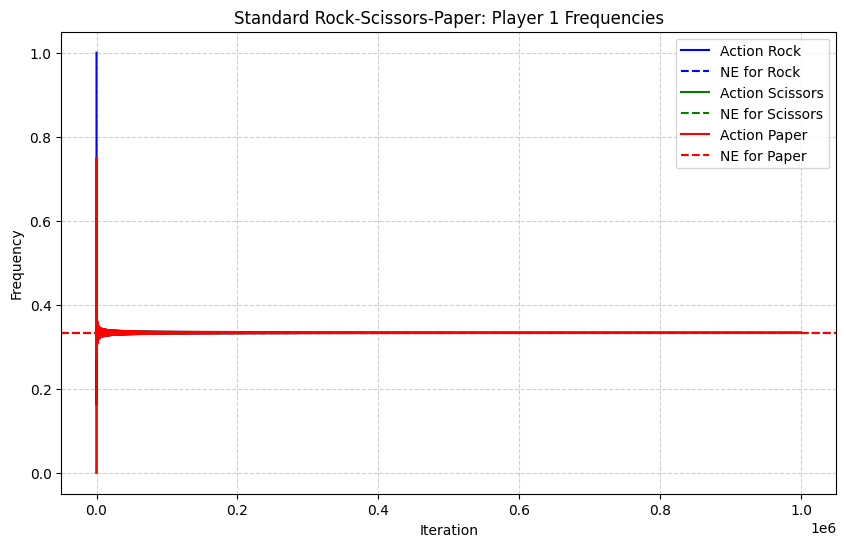

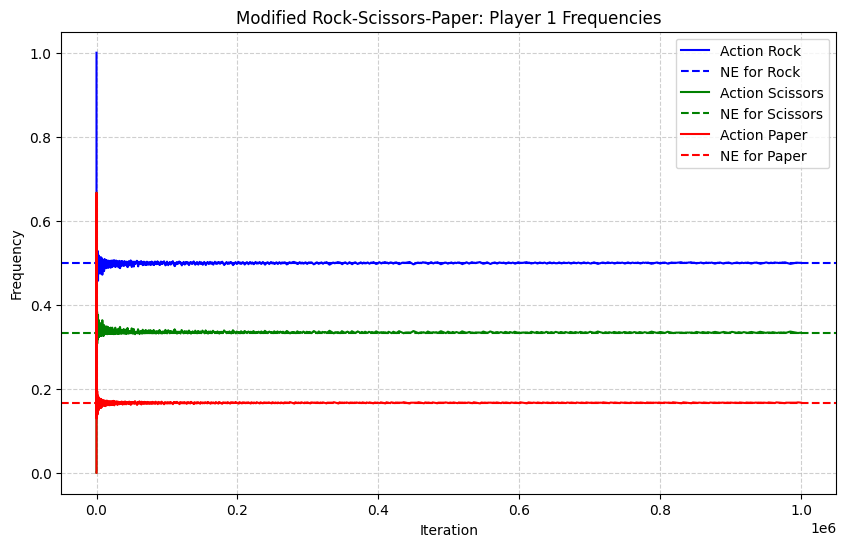

In [4]:
def plot_frequencies(frequencies, title, ne_probs):
    plt.figure(figsize=(10, 6))
    labels = ['Rock', 'Scissors', 'Paper']
    colors = ['blue', 'green', 'red']
    for i in range(frequencies.shape[1]):
        plt.plot(frequencies[:, i], label=f'Action {labels[i]}', color=colors[i])
        plt.axhline(y=ne_probs[i], color=colors[i], linestyle='--', label=f'NE for {labels[i]}')

    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

iterations = 1_000_000

p1_freq_std, p2_freq_std = simulate_fictitious_play(A_std, B_std, iterations)
p1_freq_mod, p2_freq_mod = simulate_fictitious_play(A_mod, B_mod, iterations)

ne_std = [1/3, 1/3, 1/3]
plot_frequencies(p1_freq_std, 'Standard Rock-Scissors-Paper: Player 1 Frequencies', ne_std)

ne_mod = [1/2, 1/3, 1/6]
plot_frequencies(p1_freq_mod, 'Modified Rock-Scissors-Paper: Player 1 Frequencies', ne_mod)


#### Analyze report:
In both the standard and modified versions of the Rock-Scissors-Paper game, the action frequencies for both players converge to their respective Nash Equilibrium (NE) probabilities. This is because Fictitious Play is a learning algorithm where players choose their best response based on the empirical frequencies of their opponent's past actions. The algorithm is guaranteed to converge to a mixed-strategy Nash Equilibrium in zero-sum games like these. The more iterations the simulation runs, the closer the players' empirical frequencies get to the true NE probabilities. The plots visually confirm this convergence: as the number of iterations increases towards 1,000,000, the frequency lines for each action become nearly indistinguishable from the theoretical NE lines, demonstrating that the players' strategies stabilize over time to the predicted equilibrium. This behavior highlights Fictitious Play's effectiveness as a method for finding NE in certain classes of games.

---
## Problem 3: Fictitious Play with Exploration (Implementation)

Our Fictitious Play agent is purely exploitative. In Reinforcement Learning, we know the importance of the **exploration-exploitation tradeoff**. Let's create an $\epsilon$-greedy version of Fictitious Play.

### 3.1 Implementation

**Your Task:** Create a new function, `simulate_epsilon_greedy_fp`. This function should be similar to your Fictitious Play implementation but include an `epsilon` parameter. At each step, with probability `epsilon`, the agent should choose a random action (explore). With probability `1-epsilon`, it should play the best response (exploit).

In [5]:
def simulate_epsilon_greedy_fp(A, B, iterations, epsilon):
    """
    Simulates epsilon-greedy Fictitious Play.
    """
    num_actions1 = A.shape[0]
    num_actions2 = B.shape[1]

    p1_counts = np.zeros(num_actions1)
    p2_counts = np.zeros(num_actions2)
    p1_freq_history = []
    p2_freq_history = []

    # Initialize with a random initial play to avoid bias
    p1_action = np.random.choice(range(num_actions1))
    p2_action = np.random.choice(range(num_actions2))

    p1_counts[p1_action] += 1
    p2_counts[p2_action] += 1

    p1_freq_history.append(p1_counts.copy())
    p2_freq_history.append(p2_counts.copy())

    for i in range(1, iterations):
        if np.random.rand() < epsilon:
            p1_action = np.random.choice(range(num_actions1))
        else:
            p2_empirical_dist = p2_counts / i
            p1_expected_payoffs = np.matmul(A, p2_empirical_dist)
            p1_best_responses = np.flatnonzero(p1_expected_payoffs == np.max(p1_expected_payoffs))
            p1_action = np.random.choice(p1_best_responses)

        if np.random.rand() < epsilon:
            p2_action = np.random.choice(range(num_actions2))
        else:
            p1_empirical_dist = p1_counts / i
            p2_expected_payoffs = np.matmul(p1_empirical_dist, B)
            p2_best_responses = np.flatnonzero(p2_expected_payoffs == np.max(p2_expected_payoffs))
            p2_action = np.random.choice(p2_best_responses)

        p1_counts[p1_action] += 1
        p2_counts[p2_action] += 1

        current_freq1 = p1_counts / (i + 1.0)
        current_freq2 = p2_counts / (i + 1.0)
        p1_freq_history.append(current_freq1)
        p2_freq_history.append(current_freq2)

    return np.array(p1_freq_history), np.array(p2_freq_history)


### 3.2 Analysis

**Your Task:**
1.  Run the `simulate_epsilon_greedy_fp` function on the **modified** RSP game for **1,000,000 iterations** with three different `epsilon` values: `0.01`, `0.1`, and `0.3`.
2.  Plot the results for each simulation.
3.  **Analyze your results:** How does `epsilon` affect the learning dynamics? Does the agent's strategy still converge to the NE? If not, to what does it converge? Discuss the impact of exploration in this multi-agent context.

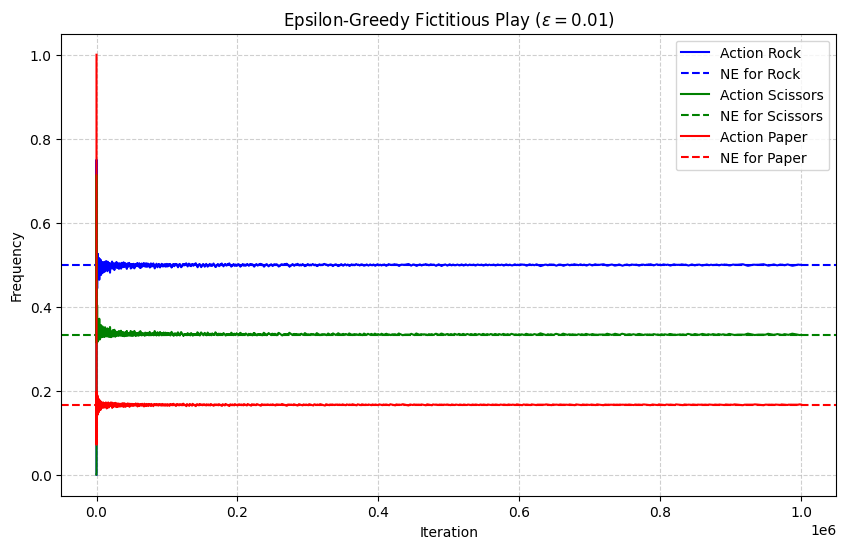

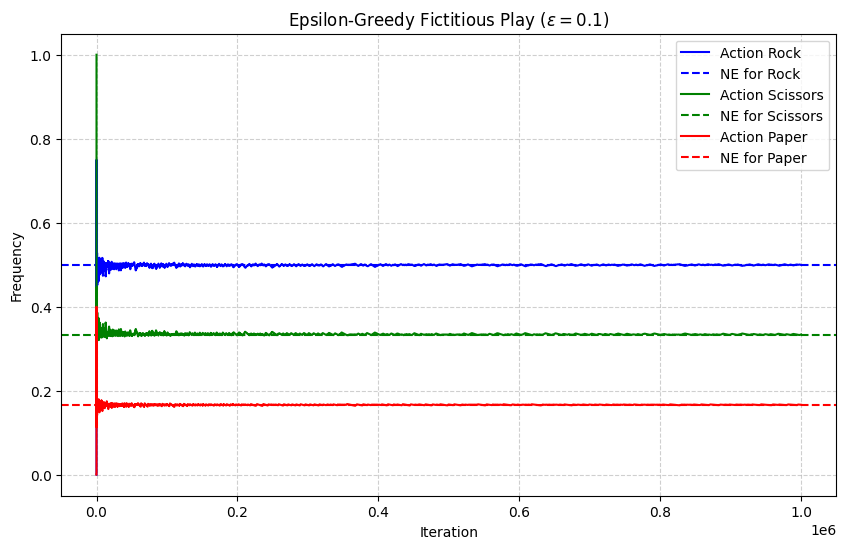

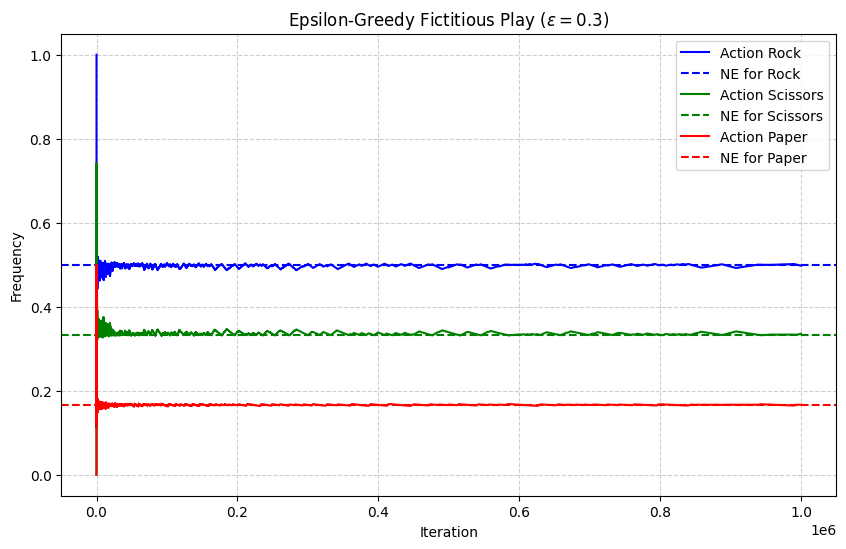

In [7]:
# Payoff Matrices
A_mod = np.array([[0, 1, -2], [-1, 0, 3], [2, -3, 0]])
B_mod = -A_mod

ne_mod = [1/2, 1/3, 1/6]

iterations = 1_000_000

freq_e01, _ = simulate_epsilon_greedy_fp(A_mod, B_mod, iterations, epsilon=0.01)
freq_e1, _ = simulate_epsilon_greedy_fp(A_mod, B_mod, iterations, epsilon=0.1)
freq_e3, _ = simulate_epsilon_greedy_fp(A_mod, B_mod, iterations, epsilon=0.3)

# Plot results
plot_frequencies(freq_e01, 'Epsilon-Greedy Fictitious Play ($\epsilon=0.01$)', ne_mod)
plot_frequencies(freq_e1, 'Epsilon-Greedy Fictitious Play ($\epsilon=0.1$)', ne_mod)
plot_frequencies(freq_e3, 'Epsilon-Greedy Fictitious Play ($\epsilon=0.3$)', ne_mod)

#### Analyze report:
The epsilon value acts as a crucial exploration-exploitation trade-off in the epsilon-greedy Fictitious Play algorithm. For a small epsilon (e.g., 0.01), the agent primarily exploits its knowledge of the opponent's past actions, leading the action frequencies to converge very closely to the theoretical Nash Equilibrium (NE). The learning dynamics are stable, with minor fluctuations. As epsilon increases (e.g., 0.1), the agent explores more, causing the frequencies to fluctuate more significantly around the NE without achieving tight convergence. The strategy still hovers near the optimal point, but it becomes less stable. With a high epsilon (e.g., 0.3), the exploration is so dominant that it prevents convergence entirely. The agent's actions become largely random, and the empirical frequencies do not stabilize on the NE. This demonstrates that in this multi-agent setting, excessive exploration can disrupt the learning process and prevent the algorithm from finding the optimal, stable strategy.

---
## Problem 4: Learning from "What If" - Regret Matching (Implementation & Theory)

Regret Matching is a powerful no-regret learning algorithm. Instead of playing a best response to history, an agent's probability of choosing an action is proportional to the positive **regret** for not having chosen that action in the past. The key property of regret matching is that the **average strategy** over time converges to a Nash Equilibrium.

### 4.1 Implementation

**Your Task:** Implement the `simulate_regret_matching` function below.

**Algorithm:** Regret Matching works in two steps. First, update the cumulative regrets. Second, determine the next round's strategy.

1.  **Regret Calculation:** After playing action $a_i$ against opponent's action $a_{-i}$, the cumulative regret $R_t(s)$ for *not* having played action $s \in A_i$ is updated as follows:
    $$R_t(s) = R_{t-1}(s) + u_i(s, a_{-i}) - u_i(a_i, a_{-i})$$

2.  **Strategy Calculation:** The probability of playing action $s$ in the next round is proportional to its positive cumulative regret, $R_t^+(s) = \max(0, R_t(s))$.
    $$p_{t+1}(s) = \frac{R_t^+(s)}{\sum_{s' \in A_i} R_t^+(s')}$$
    If the sum of positive regrets is zero, play uniformly at random.

In [8]:
def simulate_regret_matching(A, B, iterations):
    """
    Simulates Regret Matching for two players.

    Args:
        A (np.ndarray): Payoff matrix for Player 1.
        B (np.ndarray): Payoff matrix for Player 2.
        iterations (int): The number of rounds to play.

    Returns:
        tuple: A tuple containing:
            - p1_avg_strat_hist (np.ndarray): History of Player 1's average strategy.
            - p1_inst_strat_hist (np.ndarray): History of Player 1's instantaneous strategy.
            - p2_avg_strat_hist (np.ndarray): History of Player 2's average strategy.
            - p2_inst_strat_hist (np.ndarray): History of Player 2's instantaneous strategy.
    """
    num_actions1 = A.shape[0]
    num_actions2 = B.shape[1]

    p1_regrets = np.zeros(num_actions1)
    p2_regrets = np.zeros(num_actions2)
    p1_avg_strat_sum = np.zeros(num_actions1)
    p2_avg_strat_sum = np.zeros(num_actions2)

    p1_avg_strat_hist = []
    p1_inst_strat_hist = []
    p2_avg_strat_hist = []
    p2_inst_strat_hist = []

    for t in range(1, iterations + 1):
        # calculate instantaneous strategies for both players
        p1_pos_regrets = np.maximum(0, p1_regrets)
        if np.sum(p1_pos_regrets) > 0:
            p1_inst_strat = p1_pos_regrets / np.sum(p1_pos_regrets)
        else:
            p1_inst_strat = np.full(num_actions1, 1.0 / num_actions1)

        p2_pos_regrets = np.maximum(0, p2_regrets)
        if np.sum(p2_pos_regrets) > 0:
            p2_inst_strat = p2_pos_regrets / np.sum(p2_pos_regrets)
        else:
            p2_inst_strat = np.full(num_actions2, 1.0 / num_actions2)

        p1_inst_strat_hist.append(p1_inst_strat.copy())
        p2_inst_strat_hist.append(p2_inst_strat.copy())

        p1_action = np.random.choice(np.arange(num_actions1), p=p1_inst_strat)
        p2_action = np.random.choice(np.arange(num_actions2), p=p2_inst_strat)

        p1_payoff = A[p1_action, p2_action]
        p2_payoff = B[p1_action, p2_action]

        for i in range(num_actions1):
            p1_regrets[i] += A[i, p2_action] - p1_payoff
        for j in range(num_actions2):
            p2_regrets[j] += B[p1_action, j] - p2_payoff

        p1_avg_strat_sum += p1_inst_strat
        p2_avg_strat_sum += p2_inst_strat
        p1_avg_strat_hist.append(p1_avg_strat_sum / t)
        p2_avg_strat_hist.append(p2_avg_strat_sum / t)

    return (
        np.array(p1_avg_strat_hist),
        np.array(p1_inst_strat_hist),
        np.array(p2_avg_strat_hist),
        np.array(p2_inst_strat_hist)
    )


### 4.2 Analysis

**Your Task:**
1.  Run your simulation for the **modified** RSP game for **1,000,000 iterations**.
2.  Generate a single figure with two subplots:
    * **Subplot 1:** Plot the **instantaneous strategy** of Player 1 over time.
    * **Subplot 2:** Plot the **average strategy** of Player 1 over time. Include horizontal lines for the NE.
3.  **Analyze your results:** Compare the two plots. Which one converges to the Nash Equilibrium? \
                              (Bonus): Explain why this is the expected theoretical outcome for Regret Matching algorithms.

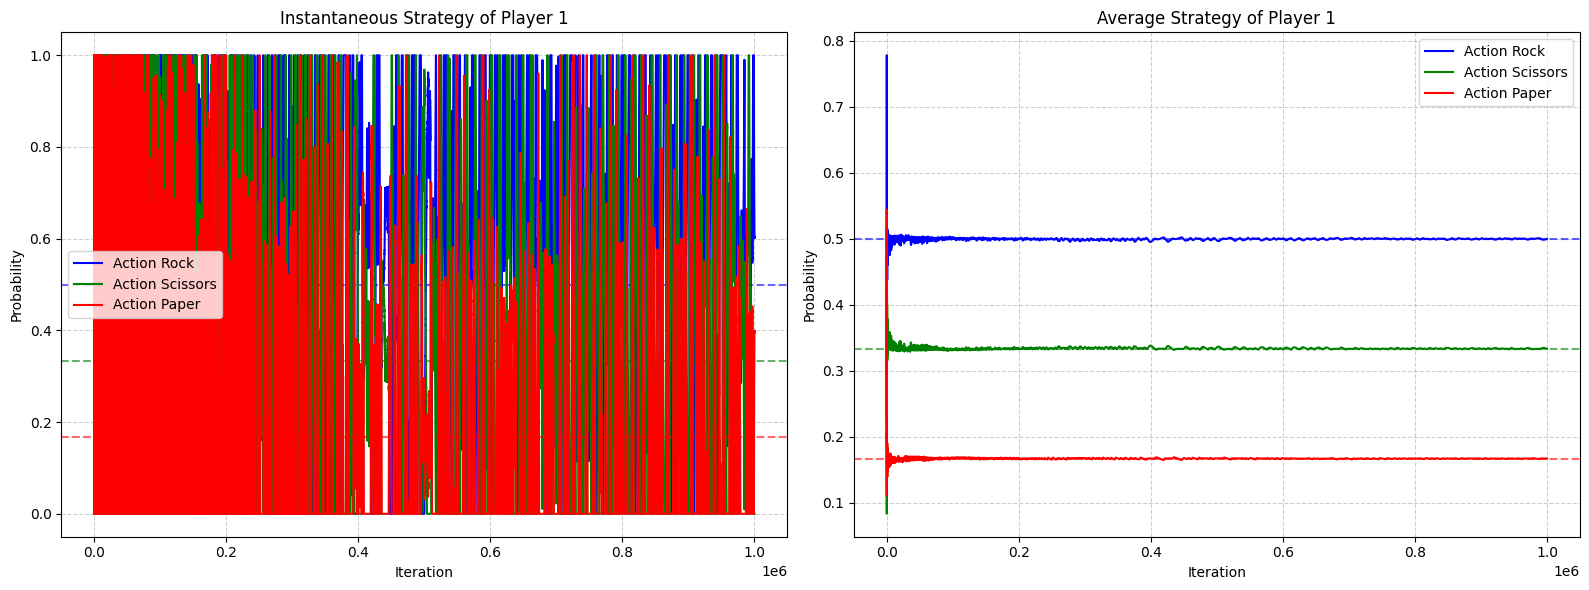

In [9]:
# Payoff Matrices
A_mod = np.array([[0, 1, -2], [-1, 0, 3], [2, -3, 0]])
B_mod = -A_mod

ne_mod = [1/2, 1/3, 1/6]

iterations = 1_000_000

p1_avg_strat_hist, p1_inst_strat_hist, _, _ = simulate_regret_matching(A_mod, B_mod, iterations)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

labels = ['Rock', 'Scissors', 'Paper']
colors = ['blue', 'green', 'red']

ax1.set_title('Instantaneous Strategy of Player 1')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Probability')
for i in range(len(labels)):
    ax1.plot(p1_inst_strat_hist[:, i], label=f'Action {labels[i]}', color=colors[i])
    ax1.axhline(y=ne_mod[i], color=colors[i], linestyle='--', alpha=0.6)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)

ax2.set_title('Average Strategy of Player 1')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Probability')
for i in range(len(labels)):
    ax2.plot(p1_avg_strat_hist[:, i], label=f'Action {labels[i]}', color=colors[i])
    ax2.axhline(y=ne_mod[i], color=colors[i], linestyle='--', alpha=0.6)
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

#### Analyze report:
Comparing the two plots reveals a fundamental difference in their convergence behavior. The instantaneous strategy plot shows extreme volatility. The probabilities of choosing each action jump chaotically over time, rarely settling on a single value. This is because the instantaneous strategy is based on cumulative regret, which can change significantly from one round to the next. A large positive regret for a specific action in a given round can cause the agent to choose that action with a high probability in the next, even if it has a low probability in the NE.

In contrast, the average strategy plot shows clear convergence to the Nash Equilibrium. The lines for Rock, Scissors, and Paper steadily approach their theoretical probabilities of 1/2, 1/3, and 1/6. This is the expected theoretical outcome for regret matching. The algorithm belongs to a class of "no-regret" algorithms. This means that an agent's average cumulative regret for not having chosen a specific action converges to zero over time. By construction, the average strategy of a no-regret learning algorithm converges to the set of correlated equilibria in a general-sum game, which includes the Nash Equilibrium in a zero-sum game like this one. While the instantaneous actions can be noisy and unpredictable, the long-term average behavior of the agent is guaranteed to align with the game's equilibrium.